IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK

In this notebook we will be classifying the images provided in the cifar10 dataset from tensorflow. There are total 10 classes of images (eg:airplane,automobile,bird etc).

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
(X_train).shape

(50000, 32, 32, 3)

In [5]:
print((X_test).shape)
print(X_train[0])
print(y_train.shape)

(10000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(50000, 1)


In [6]:
y_train[:5]   #currently each value is an array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#changing y_train into a 1d array
y_train=y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

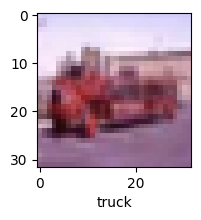

In [10]:
plot_sample(X_train,y_train,67)

In [11]:
X_train/255
X_test/255

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

BUILDING AN ARTIFICIAL NEURAL NETWORK

In [18]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)
ann.fit(X_train,y_train,epochs=5)

d:\.vscode\ML_PREP\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.0999 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.1000 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.1000 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.1000 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.1000 - loss: nan


In [19]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1000 - loss: nan


[nan, 0.10000000149011612]

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy is very poor 

BUILDING A CONVOLUTIONAL NEURAL NETWORK

In [22]:
cnn=models.Sequential([

    #cnn
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

d:\.vscode\ML_PREP\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3960 - loss: 1.8707
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5402 - loss: 1.2916
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5993 - loss: 1.1459
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6366 - loss: 1.0463
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6593 - loss: 0.9803
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6820 - loss: 0.9155
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7000 - loss: 0.8622
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7207 - loss: 0.8112
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7316 - loss: 0.7734
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7452 - loss: 0.7320


In [25]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6525 - loss: 1.1130


[1.1129734516143799, 0.6524999737739563]

In [27]:
y_test[:5]
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[9.97512834e-04, 1.07589178e-04, 4.50211950e-03, 8.19674194e-01,
        1.48016354e-03, 4.50695902e-02, 8.91123489e-02, 1.47492960e-04,
        3.87521200e-02, 1.56835114e-04],
       [3.25146355e-02, 3.97642478e-02, 1.97604204e-05, 7.89934429e-09,
        7.44381694e-08, 1.30257749e-09, 3.89704741e-10, 1.23247648e-10,
        9.23358142e-01, 4.34309756e-03],
       [2.03653350e-01, 6.07897192e-02, 1.33372629e-02, 1.09014427e-03,
        1.25736161e-03, 6.44845015e-04, 3.33854667e-04, 1.28134980e-03,
        4.44200598e-02, 6.73192143e-01],
       [7.85516739e-01, 1.28462794e-03, 7.67423064e-02, 1.74773706e-03,
        1.52232321e-02, 1.92618245e-04, 8.82526743e-04, 1.95509405e-04,
        1.17199346e-01, 1.01534871e-03],
       [1.18487216e-04, 1.29294509e-04, 4.13626293e-03, 2.41737179e-02,
        2.08922267e-01, 1.08997989e-03, 7.61032045e-01, 4.66318197e-05,
        1.57671220e-05, 3.35545832e-04]], dtype=float32)

In [32]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(9), np.int64(0), np.int64(6)]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

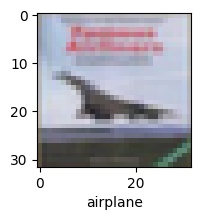

In [38]:
plot_sample(X_test,y_test,3)

In [ ]:
classes[y_classes[3]]

'ship'

In [40]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.64      0.68      1000
           1       0.87      0.71      0.78      1000
           2       0.53      0.52      0.53      1000
           3       0.46      0.53      0.49      1000
           4       0.58      0.58      0.58      1000
           5       0.56      0.60      0.58      1000
           6       0.76      0.66      0.71      1000
           7       0.78      0.64      0.70      1000
           8       0.68      0.84      0.75      1000
           9       0.68      0.81      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

